# Logistische Regression

In [1]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.cluster import KMeans

In [6]:
# Todo: Load data to DataFrame
import os 
data = pd.read_csv(os.getcwd() + '\Car_Ped_Class.csv')

data.head()

,Velocity,Weight,Class
0,4.596708,55.688821,Pedestrian
1,0.510831,45.153992,Pedestrian
2,1.281898,101.899550,Pedestrian
3,3.874816,46.065996,Pedestrian
4,0.003699,67.035412,Pedestrian


In [7]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Velocity,Weight,Class
0,2.330099,81.902016,Pedestrian
1,0.454304,45.423758,Pedestrian
2,4.784064,65.346039,Pedestrian
3,3.851115,58.844594,Pedestrian
4,1.490009,46.277503,Pedestrian


### Datenbereinigung

In [8]:
# Todo: Check for NaNs and remove them if any

data.isna().sum()
#data = data.dropna()

Velocity    0
Weight      0
Class       0
dtype: int64

### Datenaufbereitung

In [10]:
# Todo: Assign input features to variable X
X = data[ ['Velocity', 'Weight'] ]
X

,Velocity,Weight
0,2.330099,81.902016
1,0.454304,45.423758
2,4.784064,65.346039
3,3.851115,58.844594
4,1.490009,46.277503
...,...,...
3995,3.527916,74.547571
3996,1.104750,81.546460
3997,75.822329,612.834362
3998,39.646685,915.240474


In [16]:
# Todo: Assign class labels to variable y
y = data['Class']

y = pd.Series( [ 0 if d == 'Pedestrian' else 1 for d in data['Class']])
y

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    1
3998    1
3999    1
Length: 4000, dtype: int64

In [17]:
y.unique()

array([0, 1], dtype=int64)

### Modellierung

In [19]:
# Todo: Create a logistic regression model
import statsmodels.api as sm

log_reg = sm.Logit(y, X)

In [21]:
# Todo: Fit logistic regression model
log_reg = log_reg.fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.360065
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 May 2022   Pseudo R-squ.:                  0.4805
Time:                        23:23:34   Log-Likelihood:                -1440.3
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Velocity       0.3940      0.023     17.000      0.000       0.349       0.439
Weight        -0.0150      0.001    -15.685      0.000      -0.017      -0.013
==============================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [27]:
# Todo: Make predictions on X (and get class assignments!)
y_pred = log_reg.predict(X)

y_pred_class = pd.Series([  1 if p > 0.5 else 0 for p in y_pred])

In [29]:
# Todo: Print accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy_score( y, y_pred_class  )

0.77375

In [30]:
# Todo: Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cfn_mat = confusion_matrix(y, y_pred_class   )

print("confusion matrix: \n", cfn_mat)

confusion matrix: 
 [[1139  861]
 [  44 1956]]


<AxesSubplot:>

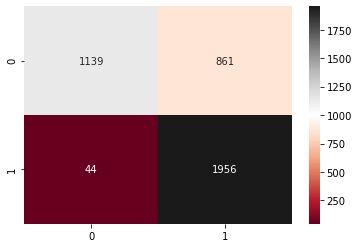

In [31]:
# Display confusion matrix with seaborn
import seaborn as sns

sns.heatmap(cfn_mat, annot=True, fmt='d', cmap="RdGy")

In [32]:
# Print classification report
print(classification_report(y, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.57      0.72      2000
           1       0.69      0.98      0.81      2000

    accuracy                           0.77      4000
   macro avg       0.83      0.77      0.76      4000
weighted avg       0.83      0.77      0.76      4000

